Dataset : CNN News Articles from 2011 to 2022

link dataset : https://www.kaggle.com/datasets/hadasu92/cnn-articles-after-basic-cleaning



In [81]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#mengekstrak file dari google drive
!unzip "/content/drive/MyDrive/machine learning/archive.zip" -d "/content/drive/MyDrive/machine learning/cnn"

Archive:  /content/drive/MyDrive/machine learning/archive.zip
  inflating: /content/drive/MyDrive/machine learning/cnn/CNN_Articels_clean/CNN_Articels_clean.csv  
  inflating: /content/drive/MyDrive/machine learning/cnn/CNN_Articels_clean_2/CNN_Articels_clean.csv  


In [83]:
#mengubah dataset menjadi dataframe
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/machine learning/cnn/CNN_Articels_clean/CNN_Articels_clean.csv")
df.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            4076 non-null   int64 
 1   Author           4076 non-null   object
 2   Date published   4076 non-null   object
 3   Category         4076 non-null   object
 4   Section          4076 non-null   object
 5   Url              4076 non-null   object
 6   Headline         4076 non-null   object
 7   Description      4076 non-null   object
 8   Keywords         4076 non-null   object
 9   Second headline  4076 non-null   object
 10  Article text     4076 non-null   object
dtypes: int64(1), object(10)
memory usage: 350.4+ KB


In [85]:
#hapus beberapa kolom yang tidak diperlukan
df = df.drop(columns=['Index', 'Author', 'Date published', 'Section', 'Url', 'Keywords', 'Second headline', 'Article text'])

In [86]:
#cek kembali dataframe
df.head(5)

,Category,Headline,Description
0,news,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...
1,news,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...
2,news,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou..."
3,business,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg..."
4,business,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...


In [87]:
#melakukan one-hot-encoding pada label
Category = pd.get_dummies(df.Category)
df_baru = pd.concat([df, Category], axis=1)
df_baru = df_baru.drop(columns='Category')
df_baru

,Headline,Description,business,entertainment,health,news,politics,sport
0,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,0,0,0,1,0,0
1,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,0,0,0,1,0,0
2,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...",0,0,0,1,0,0
3,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...",1,0,0,0,0,0
4,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4071,Australian Open: Australia's vaccine mandate i...,The Australian Open's Covid-19 vaccine mandate...,0,0,0,0,0,1
4072,Four golfers test positive ahead of South Afri...,Four golfers scheduled to play in the South Af...,0,0,0,0,0,1
4073,Peng Shuai: 'Unanimous conclusion' that tennis...,Long-time International Olympic Committee (IOC...,0,0,0,0,0,1
4074,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...,0,0,0,1,0,0


In [88]:
#mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array
deskripsi = df_baru['Headline'].values + '' + df_baru['Description'].values
label = df_baru[['business', 'entertainment', 'health', 'news', 'politics', 'sport']].values

In [89]:
#bagi data untuk training dan data untuk testing
from sklearn.model_selection import train_test_split
deskripsi_latih, deskripsi_test, label_latih, label_test = train_test_split(deskripsi, label, test_size=0.2)

In [90]:
#tokenizer dan konversi menjadi sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(deskripsi_latih) 
tokenizer.fit_on_texts(deskripsi_test)
 
sekuens_latih = tokenizer.texts_to_sequences(deskripsi_latih)
sekuens_test = tokenizer.texts_to_sequences(deskripsi_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [91]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [92]:
#callback jika akurasi dan val akurasi diatas 90%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nNilai akurasi dan validasi telah mencapai 90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [93]:
#melatih model
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
102/102 - 17s - loss: 1.1368 - accuracy: 0.5040 - val_loss: 0.9693 - val_accuracy: 0.5502 - 17s/epoch - 166ms/step
Epoch 2/30
102/102 - 9s - loss: 0.9678 - accuracy: 0.5666 - val_loss: 0.7996 - val_accuracy: 0.7157 - 9s/epoch - 88ms/step
Epoch 3/30
102/102 - 9s - loss: 0.5396 - accuracy: 0.8442 - val_loss: 0.4245 - val_accuracy: 0.8762 - 9s/epoch - 86ms/step
Epoch 4/30
102/102 - 9s - loss: 0.2835 - accuracy: 0.9138 - val_loss: 0.3674 - val_accuracy: 0.8946 - 9s/epoch - 89ms/step
Epoch 5/30
102/102 - 11s - loss: 0.1764 - accuracy: 0.9390 - val_loss: 0.3844 - val_accuracy: 0.8971 - 11s/epoch - 106ms/step
Epoch 6/30

Nilai akurasi dan validasi telah mencapai 90%!
102/102 - 7s - loss: 0.1288 - accuracy: 0.9472 - val_loss: 0.4847 - val_accuracy: 0.9044 - 7s/epoch - 70ms/step


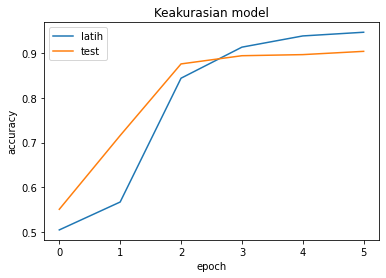

In [94]:
#membuat plot diagram akurasi
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Keakurasian model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['latih', 'test'], loc='upper left')
plt.show()

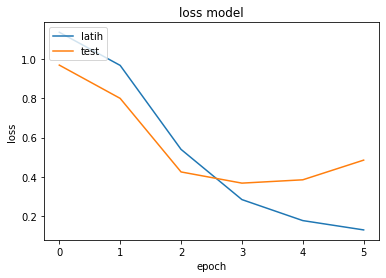

In [95]:
#membuat plot diagram loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['latih', 'test'], loc='upper left')
plt.show()